In [1]:
# -*- coding: utf-8 -*-

from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np
import os
from stingray.pulse.search import plot_profile
from stingray.pulse.pulsar import fold_events
from scipy import interpolate

/usr/local/anaconda3/lib/python3.8/site-packages/stingray/crossspectrum.py:21: UserWarning: Using standard scipy fft
  warnings.warn("Using standard scipy fft")


In [2]:
expIDlist=["P0201012149/P020101214906-20200323-02-01"]

In [3]:
Freqs=["0.00352714957,0.00"]

/usr/local/anaconda3/lib/python3.8/site-packages/stingray/utils.py:118: UserWarning: SIMON says: For exposure != 1, the uncertainty might be incorrect
  warnings.warn("SIMON says: {0}".format(message), **kwargs)


0
1
2


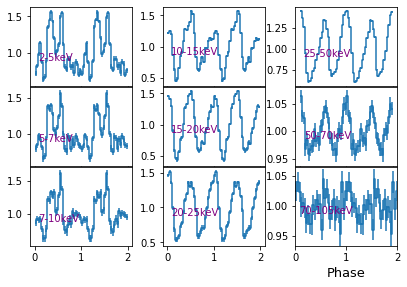

In [4]:

Energy=["le","me","he"]
Range=[["2-5","5-7","7-10"],["10-15","15-20","20-25"],["25-50","50-70","70-105"]]

for i,expID in enumerate(expIDlist):
    fig,ax=plt.subplots(3,3)
    plt.subplots_adjust(top=0.95, bottom=0.12, left=0.1, right=0.95, hspace=0.01, wspace=0.3)        
    freq = [float(item) for item in Freqs[i].split(',')]
    time_ref=0.
    time_col='TDB'
    for ii in range(3):
        file="./%s/%sscreen_all.fits"%(expID,Energy[ii])
        hdulist=fits.open(file)
        PI = hdulist[1].data['PI']
        time_obs = hdulist[1].data['time']
        time = hdulist[1].data[time_col]
        gti = np.array(fits.open(file)[2].data.tolist())
        Tobs2Tpulsar = interpolate.interp1d(time_obs, time, fill_value='extrapolate', kind='linear')
        Tpulsar2Tobs = interpolate.interp1d(time, time_obs, fill_value='extrapolate', kind='linear')
        gti = Tobs2Tpulsar(gti)
        time = time - time_ref
        gti = gti - time_ref
        
        for jj in range(3):
            if ii == 0:
                if jj==0 : 
                    mk = (PI > 224) & (PI < 578)#LE
                    axs=ax[0][0]
                elif jj==1 : 
                    mk = (PI > 579) & (PI < 815)#LE
                    axs=ax[1][0]
                elif jj==2 : 
                    print(ii)
                    mk = (PI > 816) & (PI < 1169)#LE
                    axs=ax[2][0]
            elif ii == 1:
                if jj==0 : 
                    mk = (PI > 119) & (PI < 204)#ME
                    axs=ax[0][1]
                elif jj==1 : 
                    mk = (PI > 205) & (PI < 290)#ME
                    axs=ax[1][1]
                elif jj==2 : 
                    print(ii)
                    mk = (PI > 291) & (PI < 375)#ME
                    axs=ax[2][1]
            elif ii == 2:
                if jj==0 : 
                    mk = (PI > 7) & (PI < 24)#HE
                    axs=ax[0][2]
                elif jj==1 : 
                    mk = (PI > 25) & (PI < 38)#HE
                    axs=ax[1][2]
                elif jj==2 : 
                    print(ii)
                    mk = (PI > 39) & (PI < 62)#HE
                    axs=ax[2][2]
                
            phase_bins, profile, profile_err = fold_events(time[mk], *freq, nbin=30, gtis=gti, expocorr=True)
            profile_err /= profile
            profile /= sum(profile)
            profile *= 30
        
            axs.errorbar(np.hstack([phase_bins, phase_bins + 1]), np.hstack([profile, profile]), xerr=1 / 60., yerr=np.hstack([profile_err, profile_err]), drawstyle='steps-mid')
            axs.text(0.08,1.00,"%skeV"%(Range[ii][jj]),ha='left',va='top',color='purple')
                
            plt.xlim(0, 2)
            plt.xlabel("Phase", fontsize=13)

            plt.ylim([(profile - profile_err).min(), (profile.max() + profile_err).max()])
            plt.savefig("pulse/pluse_%s.eps"%(i))
            #plt.cla()
    
    

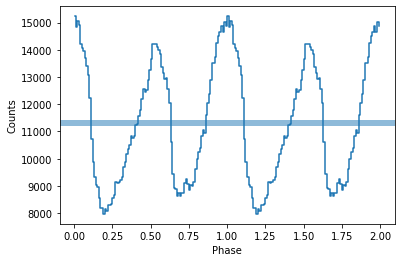

In [14]:
_ = plot_profile(phase_bins, profile)